### EDA1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# globals
FIGSIZE = (9, 6)

FILE_TRAIN = "train.csv"

In [3]:
train_orig = pd.read_csv(FILE_TRAIN)

all_columns = train_orig.columns

In [4]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
for col in all_columns:
    print('# distinct values for:', col, 'is', train_orig[col].nunique())

# distinct values for: datetime is 10886
# distinct values for: season is 4
# distinct values for: holiday is 2
# distinct values for: workingday is 2
# distinct values for: weather is 4
# distinct values for: temp is 49
# distinct values for: atemp is 60
# distinct values for: humidity is 89
# distinct values for: windspeed is 28
# distinct values for: casual is 309
# distinct values for: registered is 731
# distinct values for: count is 822


In [6]:
# colonne da ignorare
del_columns = ['datetime', 'casual', 'registered']

TARGET = "count"

cat_cols = ['season', 'holiday','workingday', 'weather']

num_cols = set(all_columns) - set([TARGET]) - set(del_columns) - set(cat_cols)

print('Tutte le colonne:', len(all_columns))
print('Colonne ignorate:', len(del_columns))
print('target:', len([TARGET]))
print('Colonne cat:', len(cat_cols))
print('Colonne num:', len(num_cols))

Tutte le colonne: 12
Colonne ignorate: 3
target: 1
Colonne cat: 4
Colonne num: 4


In [7]:
train_orig.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [8]:
train_orig.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


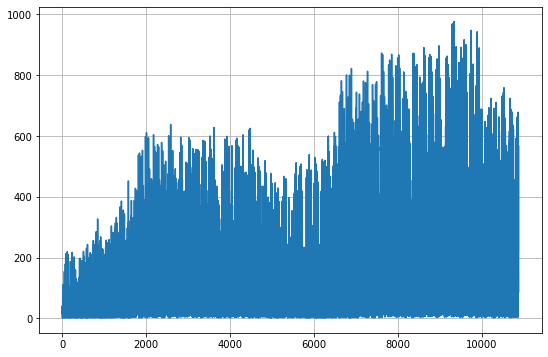

In [9]:
%matplotlib inline
# plot the temporal behaviour for count

plt.figure(figsize=FIGSIZE)
plt.plot(train_orig['count'])
plt.grid(True)
plt.show()